In [1]:
#Taxi problem

# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100

# Observation Space , Action Space

In [109]:
env.observation_space.n, env.action_space.n

(500, 6)

Observation Space contains 500 states and action state contains 6 possible actions.

500 | 25 taxi positions, 5 potential passenger locations, and 4 destinations.

Observation Space: Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations.

Rewards System: Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.


# Initialize Q values

In [110]:
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))

#Update Q table
# Q(s,a) = (1-alpha)Q(s,a) + alpha[r + gamma *max_over_next_action(Q(s',a'))]

In [123]:
#define hyper params
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))
alpha = 0.1
gamma = 0.6

def update_q_table(state,action,reward,next_state,Q):
    old_value = Q[state,action]
    new_value = max(Q[next_state])
    Q[state,action] = (1-alpha)*old_value + alpha*(reward+gamma*new_value)
    return Q
    

# Implement Q table

In [52]:
num_episode = 1000
episode_reward_array = np.zeros((1000,1))
for ite in range(num_episode):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    action_ite=1
    while not terminated:
        if action_ite<=max_actions:
            action_ite+=1
            action = env.action_space.sample() #random action
            next_state, reward, terminated, truncated, info = env.step(action) 
            Q = update_q_table(state,action,reward,next_state,Q)
            episode_reward+=reward
            state = next_state
        else:
            terminated=True
    
    
    episode_reward_array[ite] = episode_reward
    if ite%100 ==0:
        print(ite)
    

0
100
200
300
400
500
600
700
800
900


In [53]:
np.mean(episode_reward_array) # average reward per episode for randomnly selected action

-390.73

# Now instead of random action, take the best action based on the Q table

In [381]:
#define hyper params
n_state = 500
n_action = 6
Q = np.zeros((n_state,n_action))
alpha = 0.1
gamma = 0.6

def update_q_table(state,action,reward,next_state,Q):
    old_value = Q[state,action]
    new_value = max(Q[next_state])
    Q[state,action] = (1-alpha)*old_value + alpha*(reward+gamma*new_value)
    return Q
    

In [400]:
num_episode = 1000
episode_reward_array = np.zeros((num_episode,1))
max_actions=200

penalties_in_each_episode = []
for ite in range(num_episode):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    action_ite=0
    #print(state)
    best_state=[]
    best_action=[]
    best_reward=[]
    penalties=0
    penalty_list =[]
    
    if ite==0:
          best_episode_reward = -100
    
    while not terminated:
        if action_ite<=max_actions:
            action_ite+=1
            action = np.argmax(Q[state]) #best action
            
            best_state.append(state)
            best_action.append(action)
            
            #print(action_ite)
            
            next_state, reward, terminated, truncated, info = env.step(action) 
            Q = update_q_table(state,action,reward,next_state,Q)
            best_reward.append(reward)
            episode_reward+=reward
            state = next_state
            if reward == -10:
                penalties+=1
                
            #print("reward at each step: ",reward)
            #print(terminated, truncated)
            #print(reward)
        else:
            terminated=True
            #print("It is terminated")
    print("episode_reward",episode_reward)
    penalties_in_each_episode.append(penalties)
    if episode_reward>best_episode_reward:
        print("------>",episode_reward)
        best_episode_reward=episode_reward
        chosen_state  = best_state
        chosen_action = best_action
        chosen_reward = best_reward
        chosen_env = env
        penalty_list.append(penalties)
    #print("best episode reward is : ",best_episode_reward)
    episode_reward_array[ite] = episode_reward

episode_reward 7
------> 7
episode_reward 8
------> 8
episode_reward 6
episode_reward -7
episode_reward 13
------> 13
episode_reward -1
episode_reward -22
episode_reward 0
episode_reward 10
episode_reward 10
episode_reward 8
episode_reward 9
episode_reward 7
episode_reward 1
episode_reward -15
episode_reward 12
episode_reward 8
episode_reward 12
episode_reward 9
episode_reward 5
episode_reward 10
episode_reward 0
episode_reward 11
episode_reward 11
episode_reward 7
episode_reward 12
episode_reward 1
episode_reward -15
episode_reward -3
episode_reward -13
episode_reward -38
episode_reward 3
episode_reward 12
episode_reward -11
episode_reward -13
episode_reward 9
episode_reward 10
episode_reward 13
episode_reward 9
episode_reward 10
episode_reward -4
episode_reward 8
episode_reward 2
episode_reward 7
episode_reward -5
episode_reward 6
episode_reward 8
episode_reward 10
episode_reward 8
episode_reward 8
episode_reward -14
episode_reward -25
episode_reward 4
episode_reward 7
episode_reward

episode_reward 3
episode_reward 12
episode_reward 12
episode_reward 7
episode_reward 5
episode_reward -6
episode_reward 5
episode_reward 8
episode_reward 14
episode_reward 7
episode_reward 15
episode_reward -2
episode_reward 6
episode_reward 4
episode_reward 9
episode_reward 4
episode_reward 7
episode_reward 3
episode_reward -4
episode_reward 0
episode_reward 6
episode_reward 11
episode_reward 9
episode_reward -1
episode_reward 6
episode_reward 10
episode_reward 9
episode_reward 6
episode_reward 9
episode_reward 6
episode_reward 9
episode_reward 10
episode_reward 13
episode_reward 11
episode_reward 12
episode_reward -20
episode_reward -1
episode_reward 9
episode_reward 13
episode_reward 12
episode_reward 6
episode_reward 8
episode_reward 11
episode_reward 6
episode_reward 5
episode_reward 5
episode_reward 7
episode_reward 12
episode_reward 12
episode_reward 5
episode_reward -6
episode_reward 4
episode_reward 0
episode_reward 10
episode_reward 1
episode_reward 1
episode_reward 9
episode

In [403]:
import matplotlib.pyplot as plt
np.mean(episode_reward_array)

3.762

In [402]:
penalties_in_each_episode

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [404]:
chosen_reward

[-1, -1, -1, -1, -1, 20]

In [405]:
chosen_state

[408, 416, 316, 216, 116, 16]

In [406]:
chosen_action

[4, 1, 1, 1, 1, 5]

In [398]:
def render():
        state_image = env.render()
        plt.imshow(state_image)
        plt.show()

1
-1


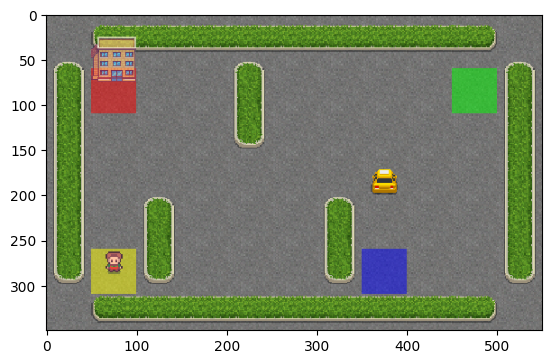

3
-1


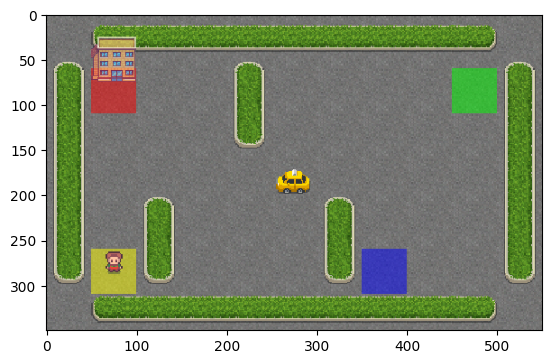

3
-1


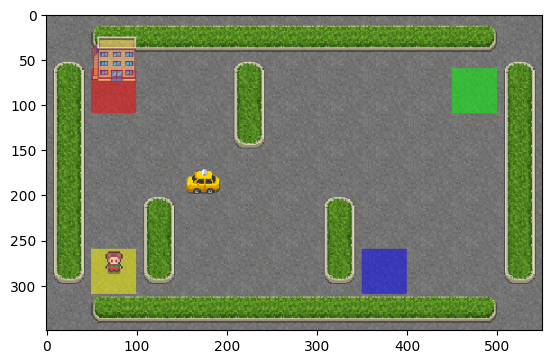

3
-1


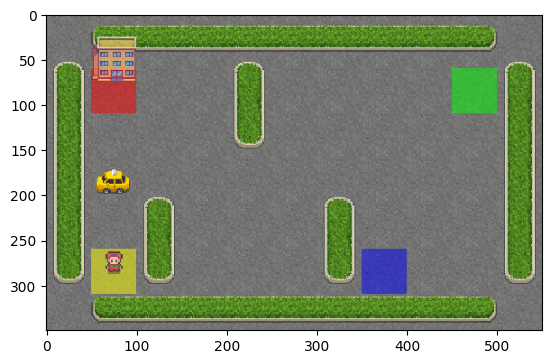

0
-1


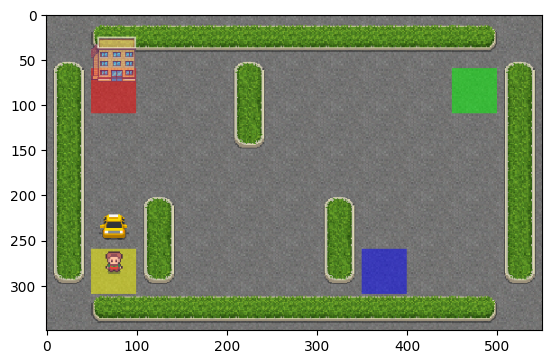

0
-1


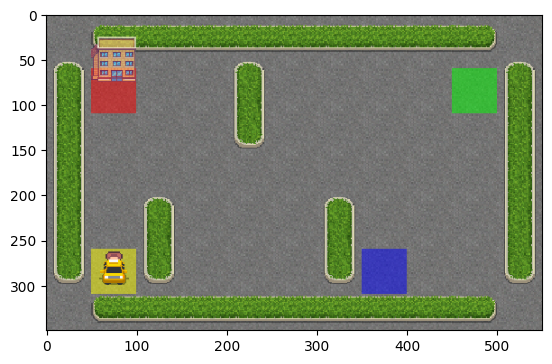

4
-1


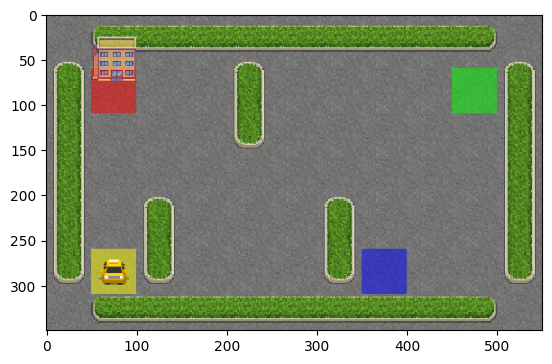

1
-1


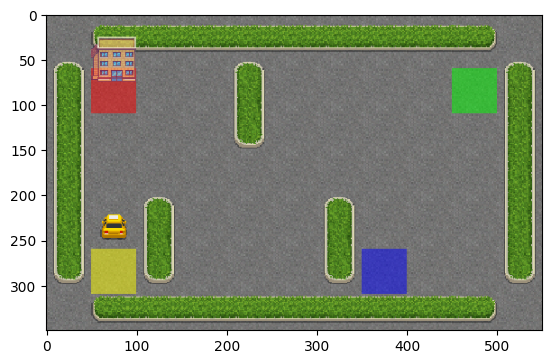

1
-1


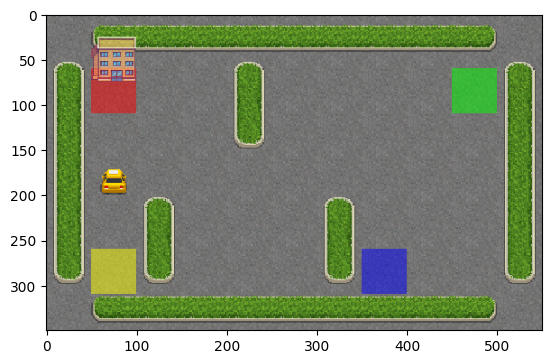

1
-1


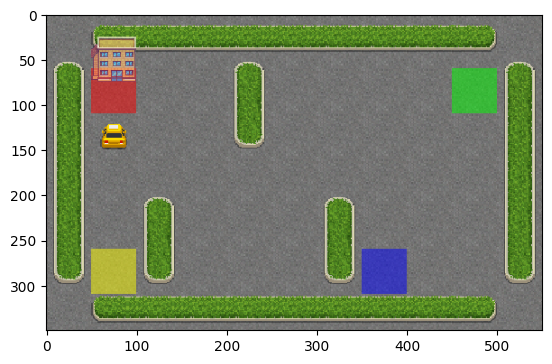

1
-1


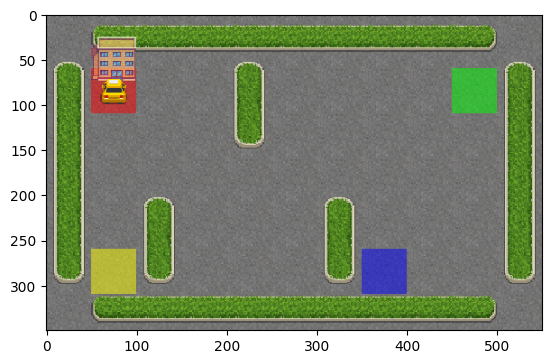

5
20


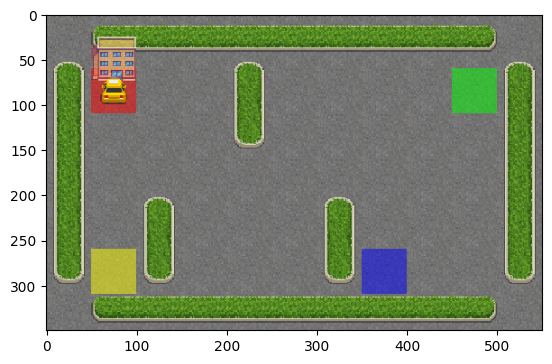

In [407]:
state, info = env.reset()
done = False
reward_score=0

while not done:
    
    action = np.argmax(Q[state])
    print(action)
    next_state, reward, done, truncated, info = env.step(action)
    #n_step+=1
    print(reward)
    reward_score+=reward
    render()
    state=next_state
    #print(n_step)

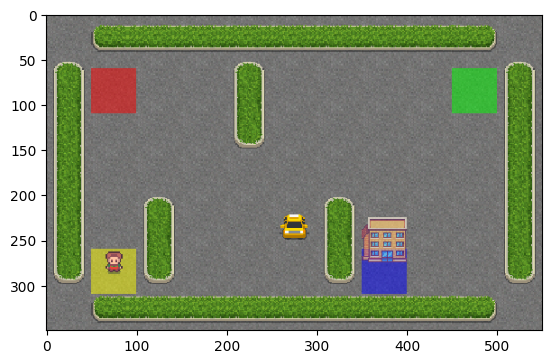

In [380]:
state, info = env.reset()
render()

/home/p302793/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)